In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')


%matplotlib inline

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_train['source']='train'
df_test['source']='test'
df_full=pd.concat([df_train,df_test])
print('Shape Train data :',df_train.shape)
print('Shape Test data :',df_test.shape)
print('Shape Full data :',df_full.shape)

Shape Train data : (54808, 15)
Shape Test data : (23490, 14)
Shape Full data : (78298, 15)


In [3]:
df_full.head()

,KPIs_met >80%,age,avg_training_score,awards_won?,department,education,employee_id,gender,is_promoted,length_of_service,no_of_trainings,previous_year_rating,recruitment_channel,region,source
0,1,35,49,0,Sales & Marketing,Master's & above,65438,f,0.0,8,1,5.0,sourcing,region_7,train
1,0,30,60,0,Operations,Bachelor's,65141,m,0.0,4,1,5.0,other,region_22,train
2,0,34,50,0,Sales & Marketing,Bachelor's,7513,m,0.0,7,1,3.0,sourcing,region_19,train
3,0,39,50,0,Sales & Marketing,Bachelor's,2542,m,0.0,10,2,1.0,other,region_23,train
4,0,45,73,0,Technology,Bachelor's,48945,m,0.0,2,1,3.0,other,region_26,train


In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 15 columns):
KPIs_met >80%           78298 non-null int64
age                     78298 non-null int64
avg_training_score      78298 non-null int64
awards_won?             78298 non-null int64
department              78298 non-null object
education               74855 non-null object
employee_id             78298 non-null int64
gender                  78298 non-null object
is_promoted             54808 non-null float64
length_of_service       78298 non-null int64
no_of_trainings         78298 non-null int64
previous_year_rating    72362 non-null float64
recruitment_channel     78298 non-null object
region                  78298 non-null object
source                  78298 non-null object
dtypes: float64(2), int64(7), object(6)
memory usage: 9.6+ MB


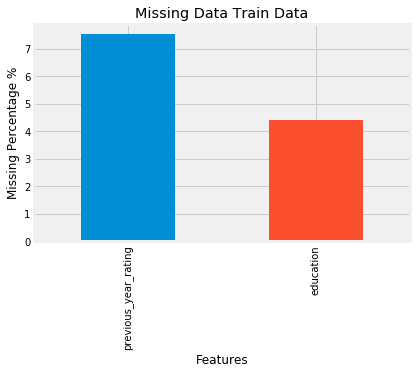

In [5]:
missing_data_train=df_train.isnull().sum()/df_train.shape[0]*100
missing_data_train=missing_data_train[missing_data_train>0]
missing_data_train.sort_values(ascending=False,inplace=True)
missing_data_train.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Missing Percentage %')
plt.title('Missing Data Train Data')
plt.show()

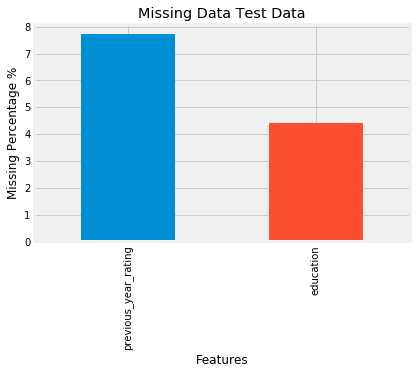

In [6]:
missing_data_test=df_test.isnull().sum()/df_test.shape[0]*100
missing_data_test=missing_data_test[missing_data_test>0]
missing_data_test.sort_values(ascending=False,inplace=True)
missing_data_test.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Missing Percentage %')
plt.title('Missing Data Test Data')
plt.show()

In [7]:
df_full['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [8]:
df_train['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [9]:
df_test['education'].unique()

array(["Bachelor's", "Master's & above", nan, 'Below Secondary'],
      dtype=object)

### length of Service

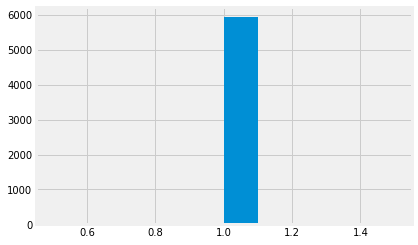

In [10]:
df_full[df_full['previous_year_rating'].isnull()]['length_of_service'].hist()

In [11]:
df_full[df_full['previous_year_rating'].isnull()]['length_of_service'].unique()

array([1])

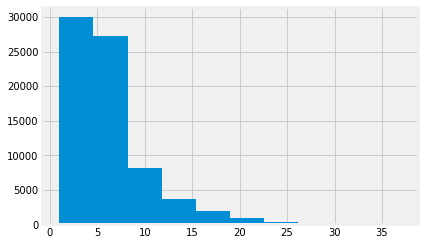

In [12]:
df_full[df_full['previous_year_rating'].notnull()]['length_of_service'].hist()

### Education

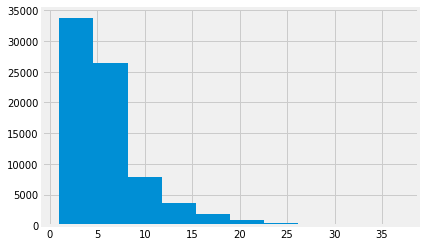

In [13]:
df_full[df_full['education'].notnull()]['length_of_service'].hist()

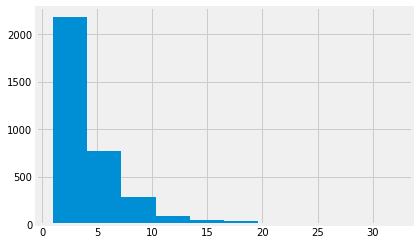

In [14]:
df_full[df_full['education'].isnull()]['length_of_service'].hist()

### Handling Missing Values

In [15]:
## most frequent education level
df_full['education'].fillna(df_full['education'].mode()[0], inplace=True)

## Creat special category of rating "NO_Rating" as employees less than 1 year in company have no "previous year rating"
df_full['previous_year_rating'].fillna('NO_Rating', inplace=True)

### Distribution of "Predictor" column

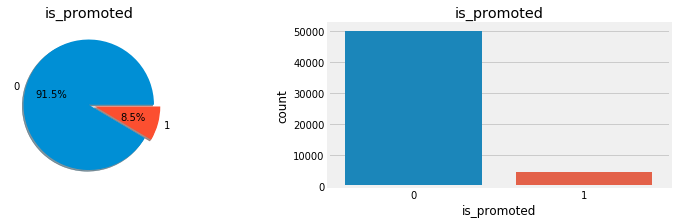

In [17]:
f,ax=plt.subplots(1,2,figsize=(12,3))
df_train['is_promoted'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('is_promoted')
ax[0].set_ylabel('')
sns.countplot('is_promoted',data=df_train,ax=ax[1])
ax[1].set_title('is_promoted')
plt.show()

In [18]:
df_full.head()

,KPIs_met >80%,age,avg_training_score,awards_won?,department,education,employee_id,gender,is_promoted,length_of_service,no_of_trainings,previous_year_rating,recruitment_channel,region,source
0,1,35,49,0,Sales & Marketing,Master's & above,65438,f,0.0,8,1,5,sourcing,region_7,train
1,0,30,60,0,Operations,Bachelor's,65141,m,0.0,4,1,5,other,region_22,train
2,0,34,50,0,Sales & Marketing,Bachelor's,7513,m,0.0,7,1,3,sourcing,region_19,train
3,0,39,50,0,Sales & Marketing,Bachelor's,2542,m,0.0,10,2,1,other,region_23,train
4,0,45,73,0,Technology,Bachelor's,48945,m,0.0,2,1,3,other,region_26,train


In [19]:
df_full.describe()

,KPIs_met >80%,age,avg_training_score,awards_won?,employee_id,is_promoted,length_of_service,no_of_trainings
count,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000,78298.000000,78298.000000
mean,0.354032,34.797619,63.349664,0.023053,39149.500000,0.085170,5.848974,1.253378
std,0.478222,7.665928,13.383664,0.150073,22602.830026,0.279137,4.248070,0.606766
min,0.000000,20.000000,39.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,0.000000,29.000000,51.000000,0.000000,19575.250000,0.000000,3.000000,1.000000
50%,0.000000,33.000000,60.000000,0.000000,39149.500000,0.000000,5.000000,1.000000
75%,1.000000,39.000000,76.000000,0.000000,58723.750000,0.000000,7.000000,1.000000
max,1.000000,60.000000,99.000000,1.000000,78298.000000,1.000000,37.000000,10.000000


In [21]:
df_train=df_full[df_full['source']=='train']
df_test=df_full[df_full['source']=='test']

In [22]:
del df_train['source']
del df_test['source']

In [23]:
df_num=df_train.select_dtypes(['float64','int64'])
df_cat=df_train.select_dtypes(['object'])
print('Continious Variables :',df_num.columns.values,'   ', len(df_num.columns.values))
print('Categorical Variables :',df_cat.columns.values,'',len(df_cat.columns.values))

Continious Variables : ['KPIs_met >80%' 'age' 'avg_training_score' 'awards_won?' 'employee_id'
 'is_promoted' 'length_of_service' 'no_of_trainings']     8
Categorical Variables : ['department' 'education' 'gender' 'previous_year_rating'
 'recruitment_channel' 'region']  6


In [24]:
df_num2=df_num
del df_num2['employee_id']
del df_num2['is_promoted']

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

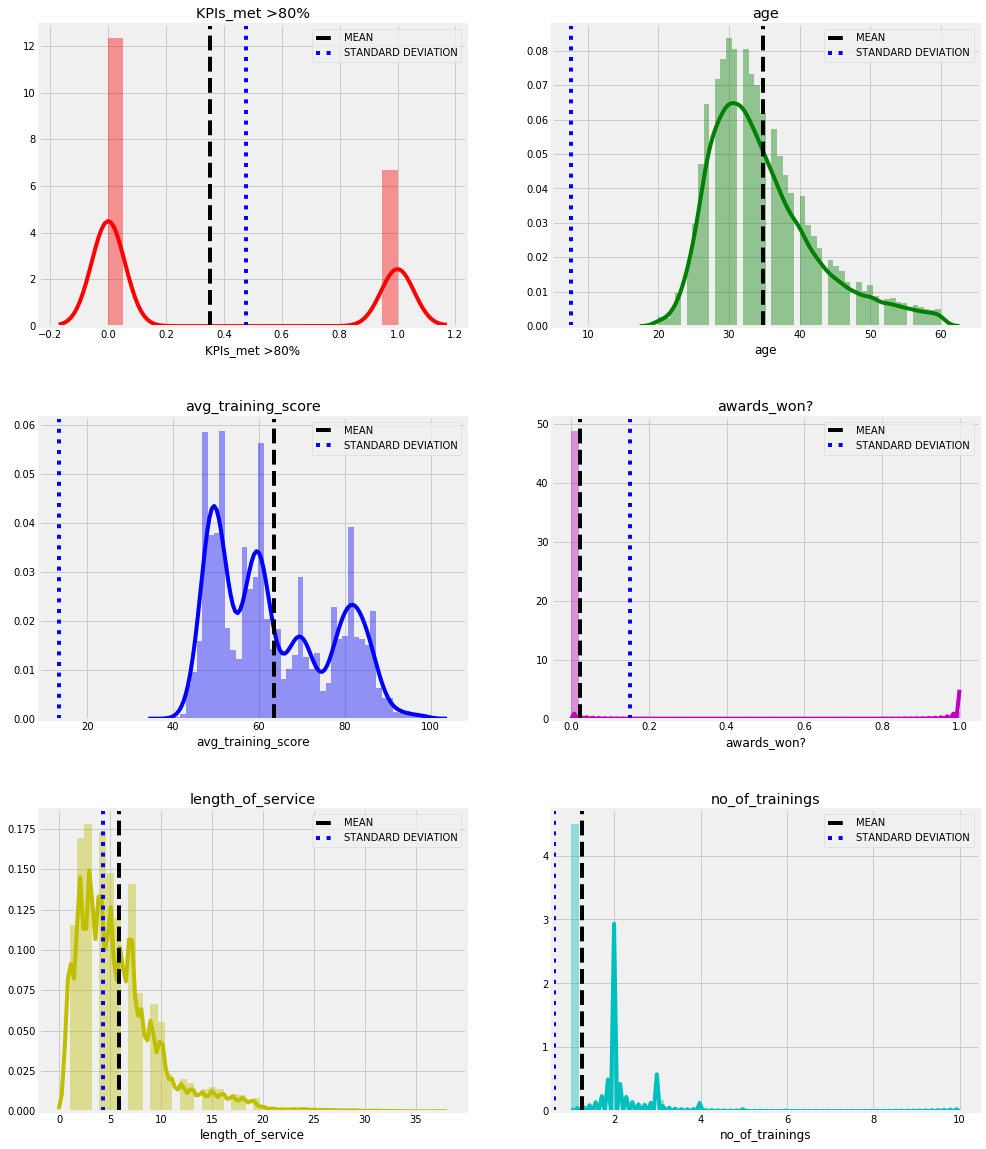

In [25]:
columns = df_num2.columns
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(15,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/3,j+1)
    #print(length/2,length/3,j+1)
    sns.distplot(df_num2[i],color=k)
    #sns.boxplot(df_num[i+1],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(df_num2[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df_num2[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

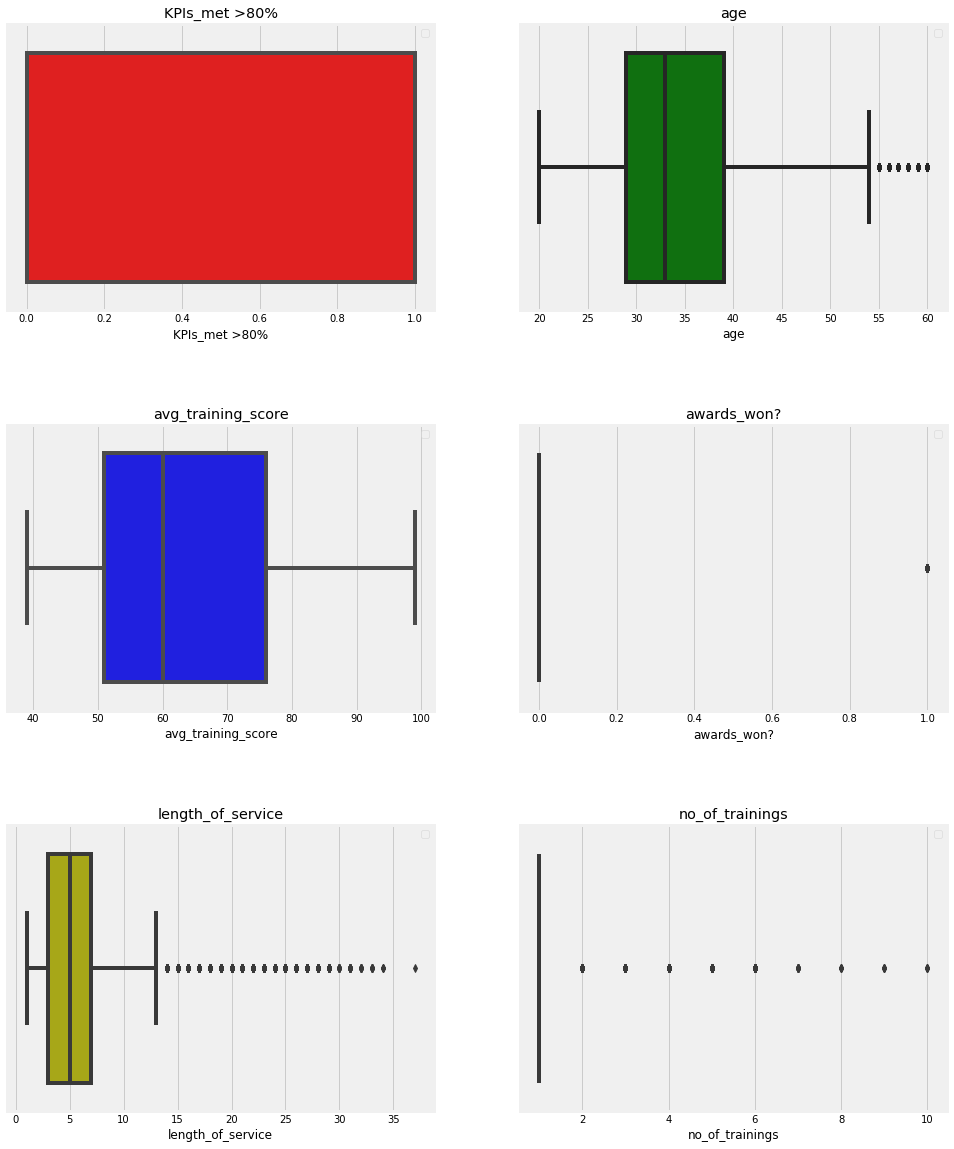

In [30]:
columns = df_num2.columns
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange",'g','y',"b","m","y"] 

plt.figure(figsize=(15,20))
for i,j,k in itertools.zip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/3,j+1)
    sns.boxplot(df_num2[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .4)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    

### Bivariate Analysis

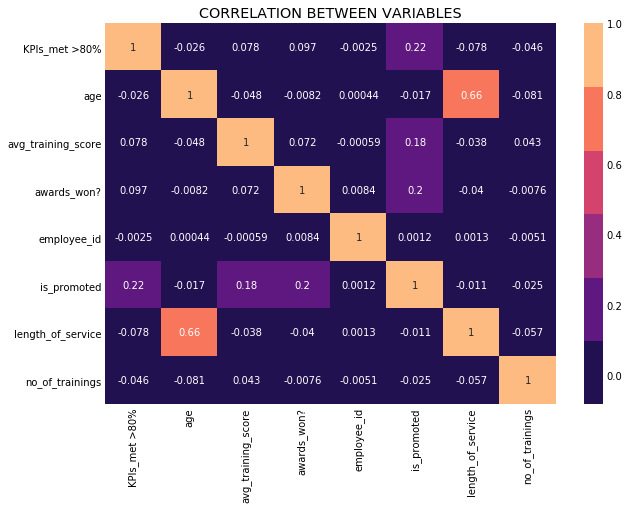

In [33]:
correlation = df_train.corr()
plt.figure(figsize=(9,7))
sns.heatmap(correlation,annot=True,edgecolor="k",cmap=sns.color_palette("magma"))
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

In [34]:
df_cat.columns

Index(['department', 'education', 'gender', 'previous_year_rating',
       'recruitment_channel', 'region'],
      dtype='object')

### Correlation between Categorical variable & traget 
***

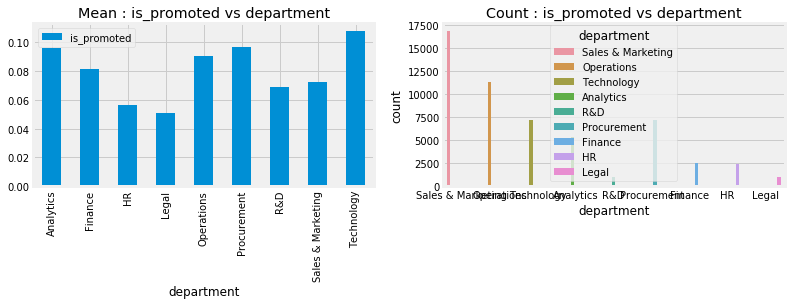

is_promoted,0.0,1.0,All
department,,,
Analytics,4840,512,5352
Finance,2330,206,2536
HR,2282,136,2418
Legal,986,53,1039
Operations,10325,1023,11348
Procurement,6450,688,7138
R&D,930,69,999
Sales & Marketing,15627,1213,16840
Technology,6370,768,7138


In [35]:
f,ax=plt.subplots(1,2,figsize=(12,3))
df_train[['department','is_promoted']].groupby(['department']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Mean : is_promoted vs department')
sns.countplot('department',hue='department',data=df_train,ax=ax[1])
ax[1].set_title('Count : is_promoted vs department')
plt.show()
pd.crosstab(df_train.department,df_train.is_promoted,margins=True).style.background_gradient(cmap='summer_r')


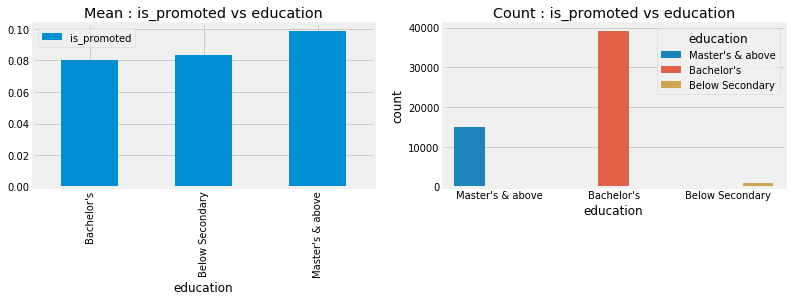

is_promoted,0.0,1.0,All
education,,,
Bachelor's,35948,3130,39078
Below Secondary,738,67,805
Master's & above,13454,1471,14925
All,50140,4668,54808


In [37]:
f,ax=plt.subplots(1,2,figsize=(12,3))
df_train[['education','is_promoted']].groupby(['education']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Mean : is_promoted vs education')
sns.countplot('education',hue='education',data=df_train,ax=ax[1])
ax[1].set_title('Count : is_promoted vs education')
plt.show()
pd.crosstab(df_train.education,df_train.is_promoted,margins=True).style.background_gradient(cmap='summer_r')


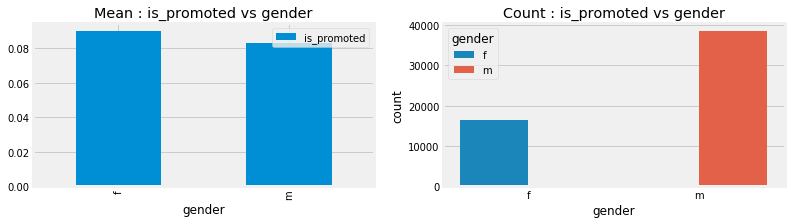

is_promoted,0.0,1.0,All
gender,,,
f,14845,1467,16312
m,35295,3201,38496
All,50140,4668,54808


In [38]:
f,ax=plt.subplots(1,2,figsize=(12,3))
df_train[['gender','is_promoted']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Mean : is_promoted vs gender')
sns.countplot('gender',hue='gender',data=df_train,ax=ax[1])
ax[1].set_title('Count : is_promoted vs gender')
plt.show()
pd.crosstab(df_train.gender,df_train.is_promoted,margins=True).style.background_gradient(cmap='summer_r')


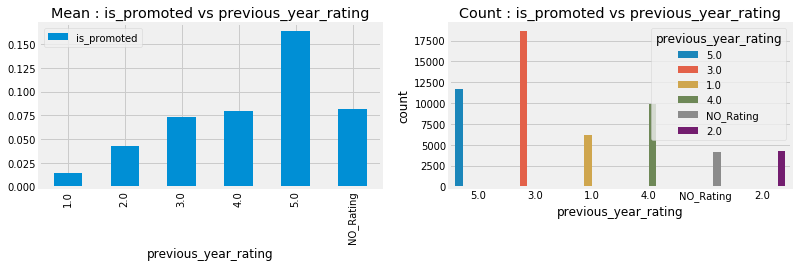

is_promoted,0.0,1.0,All
previous_year_rating,,,
1.0,6135,88,6223
2.0,4044,181,4225
3.0,17263,1355,18618
4.0,9093,784,9877
5.0,9820,1921,11741
NO_Rating,3785,339,4124
All,50140,4668,54808


In [39]:
f,ax=plt.subplots(1,2,figsize=(12,3))
df_train[['previous_year_rating','is_promoted']].groupby(['previous_year_rating']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Mean : is_promoted vs previous_year_rating')
sns.countplot('previous_year_rating',hue='previous_year_rating',data=df_train,ax=ax[1])
ax[1].set_title('Count : is_promoted vs previous_year_rating')
plt.show()
pd.crosstab(df_train.previous_year_rating,df_train.is_promoted,margins=True).style.background_gradient(cmap='summer_r')

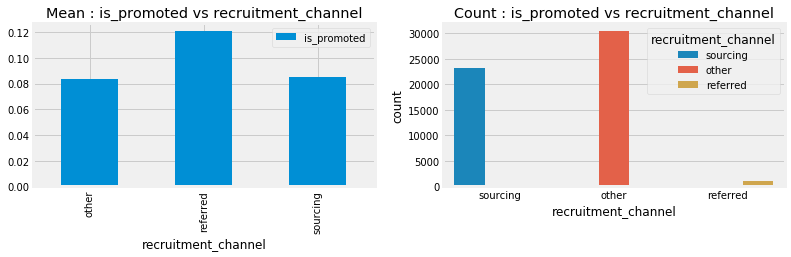

is_promoted,0.0,1.0,All
recruitment_channel,,,
other,27890,2556,30446
referred,1004,138,1142
sourcing,21246,1974,23220
All,50140,4668,54808


In [41]:
f,ax=plt.subplots(1,2,figsize=(12,3))
df_train[['recruitment_channel','is_promoted']].groupby(['recruitment_channel']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Mean : is_promoted vs recruitment_channel')
sns.countplot('recruitment_channel',hue='recruitment_channel',data=df_train,ax=ax[1])
ax[1].set_title('Count : is_promoted vs recruitment_channel')
plt.show()
pd.crosstab(df_train.recruitment_channel,df_train.is_promoted,margins=True).style.background_gradient(cmap='summer_r')

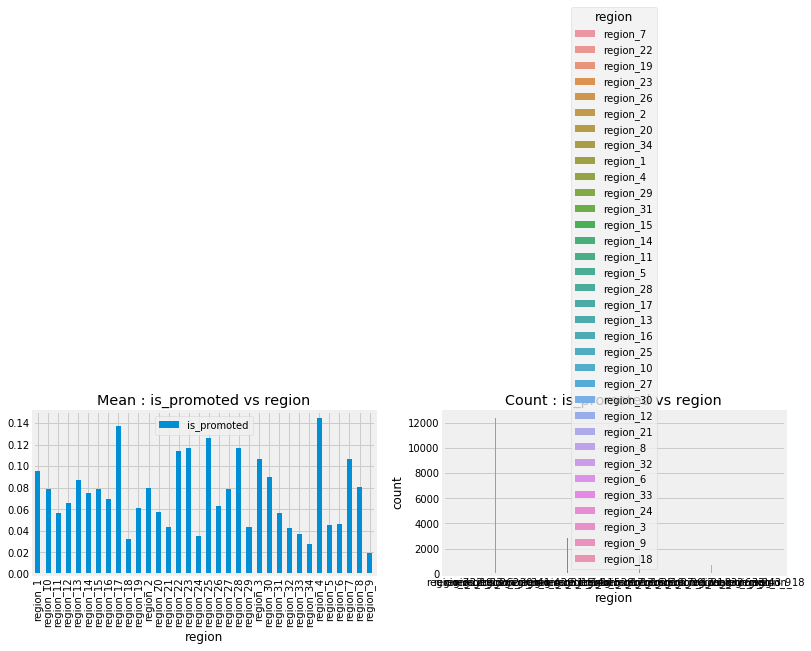

is_promoted,0.0,1.0,All
region,,,
region_1,552,58,610
region_10,597,51,648
region_11,1241,74,1315
region_12,467,33,500
region_13,2418,230,2648
region_14,765,62,827
region_15,2586,222,2808
region_16,1363,102,1465
region_17,687,109,796


In [43]:
f,ax=plt.subplots(1,2,figsize=(12,3))
df_train[['region','is_promoted']].groupby(['region']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Mean : is_promoted vs region')
sns.countplot('region',hue='region',data=df_train,ax=ax[1])
ax[1].set_title('Count : is_promoted vs region')
plt.show()
pd.crosstab(df_train.region,df_train.is_promoted,margins=True).style.background_gradient(cmap='summer_r')

In [47]:
for x in df_train:
    if df_train[x].dtype == 'object' :
        print('classLabel Correlation by:', x)
        print(df_train[[x, 'is_promoted']].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

classLabel Correlation by: department
          department  is_promoted
0          Analytics     0.095665
1            Finance     0.081230
2                 HR     0.056245
3              Legal     0.051011
4         Operations     0.090148
5        Procurement     0.096386
6                R&D     0.069069
7  Sales & Marketing     0.072031
8         Technology     0.107593
---------- 

classLabel Correlation by: education
          education  is_promoted
0        Bachelor's     0.080096
1   Below Secondary     0.083230
2  Master's & above     0.098559
---------- 

classLabel Correlation by: gender
  gender  is_promoted
0      f     0.089934
1      m     0.083151
---------- 

classLabel Correlation by: previous_year_rating
  previous_year_rating  is_promoted
0                    1     0.014141
1                    2     0.042840
2                    3     0.072779
3                    4     0.079376
4                    5     0.163615
5            NO_Rating     0.082202
---------- 

c